In [1]:
import os
import time
os.chdir(os.path.dirname(INSERT_PATH_HERE))

In [2]:
import numpy as np
import requests
import numpy as np
import pandas as pd
import json



In [3]:
df = pd.read_csv ('1kmovies.csv',sep="\t")
dfX = df[['Movie']]

not_found = 0

vectors = []
entities =list(dict.fromkeys(df['Movie'].to_list()))
for e in entities:
    entity = e[e.rindex("/")+1:]
    r = requests.get("http://kgvec2go.org/rest/get-vector/dbpedia/" + entity)
    x = json.loads(r.text)
    # Catch case that an entity is not found in the API
    if 'vector' in x:
        vectors.append(x['vector'])
    else:
        vectors.append(np.zeros(200))
        not_found = not_found + 1

print(str(not_found) + " entities not found")
dfXvectors = pd.DataFrame.from_records(vectors)

96 entities not found


In [4]:
dfXcomplete = pd.concat([dfX,dfXvectors],axis=1,join="inner")
dfXcomplete.head(25)

Movie         0         1  \
0            http://dbpedia.org/resource/Playhouse_90 -0.137760 -0.589059   
1            http://dbpedia.org/resource/Looney_Tunes -1.042180 -0.426787   
2         http://dbpedia.org/resource/Merrie_Melodies -0.735772 -0.306961   
3      http://dbpedia.org/resource/American_Playhouse -0.218308 -0.383118   
4    http://dbpedia.org/resource/Fantasia_(1940_film)  0.012596 -0.363675   
5   http://dbpedia.org/resource/Snow_White_and_the... -0.110619 -0.022438   
6   http://dbpedia.org/resource/Band_of_Brothers_(... -0.301021 -0.601196   
7   http://dbpedia.org/resource/Pinocchio_(1940_film)  0.058439 -0.564881   
8   http://dbpedia.org/resource/Harry_Potter_(film... -0.138585 -1.158717   
9               http://dbpedia.org/resource/Red_Dwarf  0.131227 -0.795182   
10         http://dbpedia.org/resource/Gimme_a_Break! -0.426197 -0.643072   
11  http://dbpedia.org/resource/Last_of_the_Summer... -0.387616 -0.849654   
12          http://dbpedia.org/resource/The_Lion_King -0.185161 -0.667758   
13  http://dbpedia.org/resource/The_Philco_Televis... -0.427943 -0.492605   
14  http://dbpedia.org/resource/Sleeping_Beauty_(1... -0.594262 -0.284907   
15  http://dbpedia.org/resource/The_Bold_Ones:_The... -0.275917 -0.490652   
16                  http://dbpedia.org/resource/Dumbo -0.090244 -0.497215   
17     http://dbpedia.org/resource/Frozen_(2013_film) -0.632902 -1.110231   
18  http://dbpedia.org/resource/Casino_Royale_(196...  0.773064  0.109179   
19  http://dbpedia.org/resource/The_Pacific_(minis...  0.069477 -0.758959   
20       http://dbpedia.org/resource/Star_Wars_(film) -0.504468 -0.495121   
21   http://dbpedia.org/resource/The_Dick_Powell_Show  0.348011  0.107263   
22  http://dbpedia.org/resource/Beauty_and_the_Bea... -0.188234 -0.491675   
23  http://dbpedia.org/resource/Aladdin_(1992_Disn... -0.485015 -0.321546   
24  http://dbpedia.org/resource/Cinderella_(1950_f... -0.136178 -0.427234   

           2         3         4         5         6         7         8  ...  \
0  -0.037958 -0.534860 -0.413675  0.489986  0.834827  0.483092 -0.237307  ...   
1   0.223503 -0.041168 -0.413734  0.103594  0.745793 -0.070818 -0.486270  ...   
2  -0.005732  0.092917 -0.477233 -0.022962  0.886615 -0.086885 -0.621619  ...   
3   0.698063  0.291182 -0.129309  0.227223  0.160146  0.404174 -0.492890  ...   
4  -0.200341 -0.288007 -0.918249  0.103618 -0.033792  0.184393  0.351371  ...   
5  -0.436584  0.132460 -0.968146  0.210315 -0.113157 -0.333683 -0.110539  ...   
6  -0.667036 -0.477340 -0.521035  0.238552  0.445494  0.480574 -0.397435  ...   
7  -0.317060 -0.099454 -0.334787 -0.012635  0.199692  0.548722  0.033585  ...   
8   0.065944 -0.110256 -1.014248  0.095200  0.208644  0.783379  0.462843  ...   
9   0.650905 -1.366069 -0.648056 -0.067780  0.027130  0.216861  0.528318  ...   
10 -0.143684  0.021588 -0.534515 -0.541924  0.903420 -0.027660  0.516001  ...   
11  0.520858 -1.152769 -0.395122 -0.078861  0.134276  0.767099 -0.086088  ...   
12  0.351287 -0.071545 -0.715235  0.654980  0.942513  0.299595 -0.796929  ...   
13 -0.227726 -0.551582 -0.155778 -0.070201  0.749041  0.692473  0.142140  ...   
14 -0.208800 -0.275717 -0.798383  0.503691  0.153642  0.466465 -0.296610  ...   
15  0.058167 -0.349791 -0.616028  0.117802  0.315908  0.584220 -0.168284  ...   
16 -0.320145 -0.082811 -0.804457  0.049052  0.170885 -0.062657  0.201343  ...   
17 -0.051083 -0.036203 -0.618483  0.644321  0.520805  0.568159 -0.492555  ...   
18 -0.051000 -0.132526 -0.715155  0.091428  0.640842 -0.264343 -0.260256  ...   
19 -0.425278 -0.280973 -0.893712  0.148944  0.398624  0.288982 -0.399282  ...   
20 -1.276071 -0.247087 -0.510309  0.043088  0.904667  0.165914 -0.123610  ...   
21 -0.063437  0.058328 -0.091351  0.022363  0.219758  0.767088  0.308749  ...   
22  0.664066 -0.080035 -0.651426  0.373124  0.129613  0.297080 -0.431981  ...   
23  0.368292 -0.076003 -0.825097  0.238973  0.173073  0.299280 -0.567592  ...   
24  0.593715 -0.1059

In [5]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=10, algorithm='auto', metric='cosine')
knn.fit(dfXvectors.to_numpy())

user1 = ["http://dbpedia.org/resource/The_Matrix","http://dbpedia.org/resource/Interstellar_(film)","http://dbpedia.org/resource/Blade_Runner"]
user2 = ["http://dbpedia.org/resource/Bambi","http://dbpedia.org/resource/Aladdin_(1992_Disney_film)","http://dbpedia.org/resource/Cinderella_(1950_film)"]

def get_recommendations(user_profile,df_vectors):
    df_uservector = df_vectors[dfX['Movie'].isin(user_profile)].mean()
    print(df_uservector)
    return knn.kneighbors([df_uservector], 10, return_distance=False)

for index in get_recommendations(user2,dfXvectors)[0]:
    print(dfX.at[index,'Movie'])

0     -0.230488
1     -0.439156
2      0.197780
3     -0.135158
4     -0.728127
         ...   
195   -0.274856
196    0.331307
197    0.062966
198   -0.103116
199    0.321939
Length: 200, dtype: float64
http://dbpedia.org/resource/Cinderella_(1950_film)
http://dbpedia.org/resource/Aladdin_(1992_Disney_film)
http://dbpedia.org/resource/Bambi
http://dbpedia.org/resource/Beauty_and_the_Beast_(1991_film)
http://dbpedia.org/resource/Tangled
http://dbpedia.org/resource/Peter_Pan_(1953_film)
http://dbpedia.org/resource/The_Three_Caballeros
http://dbpedia.org/resource/The_Little_Mermaid_(1989_film)
http://dbpedia.org/resource/Beauty_and_the_Beast_(2017_film)
http://dbpedia.org/resource/Saludos_Amigos


In [26]:
arr1 = get_recommendations(user1,dfXvectors)
arr2 = get_recommendations(user2,dfXvectors)
arr = np.append(arr1,arr2)
df = dfXvectors.iloc[arr]
print(df)

          0         1         2         3         4         5         6    \
55   0.318401  0.139367 -0.701737 -0.279444 -0.897473  0.299331  0.466589   
59  -0.256155 -0.262864 -0.451567  0.016916 -1.072240 -0.461869 -0.136405   
362  0.140722  0.256464 -0.289506 -0.067005 -0.788516 -0.310958  0.428743   
719  0.011412  0.284625 -0.402758  0.161706 -0.642788 -0.145495  0.289870   
413  0.276396 -0.000320 -0.489742  0.338217 -0.533667  0.146200  0.010560   
828  0.647876  0.425028 -0.850197  0.543665 -0.848872  0.073361  0.156451   
986  0.442210  0.337279 -0.566876  0.210853 -0.584514  0.171120  0.322006   
283 -0.426962 -0.150118 -0.368088  0.185758 -0.907161 -0.417741 -0.040905   
473  0.322986  0.083523 -0.458807  0.396477 -0.595785  0.204056  0.398959   
209 -0.013298  0.115373 -0.373912  0.026581 -0.619941 -0.011785  0.265499   
24  -0.136178 -0.427234  0.593715 -0.105923 -0.391059  0.339442  0.064706   
23  -0.485015 -0.321546  0.368292 -0.076003 -0.825097  0.238973  0.173073   

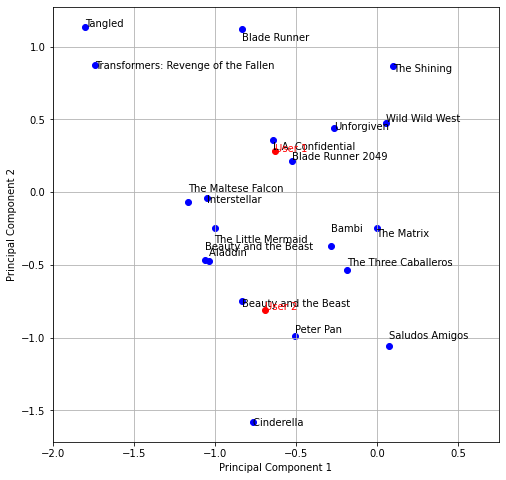

In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random as rd
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dfXvectors)
principalDf = pd.DataFrame(data = pca_result
             , columns = ['principal component 1', 'principal component 2'])

finalDf = principalDf.iloc[arr]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlim([-2.0,0.75])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.scatter(finalDf['principal component 1']
               , finalDf['principal component 2'], c='b')

for i in arr:
    str = dfX.at[i,'Movie']
    if str.find("(")>0:
        str = str[str.rindex("/")+1:str.index("(")].replace("_"," ")
    else:
        str = str[str.rindex("/")+1:].replace("_"," ")
    ax.annotate(str, (finalDf.at[i,'principal component 1'],finalDf.at[i,'principal component 2']+0.2*rd.random()-0.1))

# add users as red dots
def add_user(user_profile,plt,label):
    df_uservector = principalDf[dfX['Movie'].isin(user_profile)].mean()    
    plt.plot(df_uservector['principal component 1'], df_uservector['principal component 2'], 'ro')  
    ax.annotate(label,(df_uservector['principal component 1'], df_uservector['principal component 2']),c='r')

add_user(user1,plt,"User 1")    
add_user(user2,plt,"User 2")

ax.grid()
plt.show()